In [8]:
%load_ext autoreload
%autoreload 2

import lob

import numpy as np, pandas as pd

import matplotlib
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


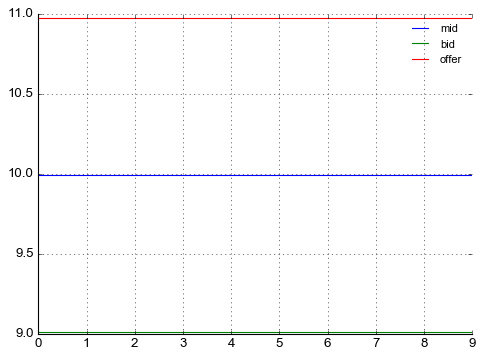

In [17]:
market = lob.Market(randomize_environment=True)

books = {}
mids = []
bids = []
offers = []
iters = 10
for i in range(iters):
    trade_print = market.lob.send(market._random_order(mid=market.lob.get_mid()))
    book = market.lob.get_level_2_book()
    books[i] = book
    mids.append(market.lob.get_mid())
    bids.append(market.lob.get_bid())
    offers.append(market.lob.get_offer())
    
    market.evolve()
books = pd.concat(books)
books = books.stack().unstack(1).unstack(1).dropna(axis=1)

mids, bids, offers = pd.Series({i: mids[i] for i in range(iters)}), pd.Series({i: bids[i] for i in range(iters)}), pd.Series({i: offers[i] for i in range(iters)})

plt.style.use('classic')
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 12})
fig = plt.figure(figsize=(7,5))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.grid(True,axis='both',linestyle=':')

ax.plot(mids, label='mid')
ax.plot(bids, label='bid')
ax.plot(offers, label='offer')

ax.legend(frameon=False, fontsize='small')

plt.show()